# **MÓDULO 35 - Cross Validation**

Nesta tarefa, você trabalhará com uma base de dados que contém informações sobre variáveis ambientais coletadas para a detecção de incêndios. O objetivo é utilizar técnicas de validação cruzada (cross-validation) para avaliar a performance de um modelo de classificação na previsão da ocorrência de um incêndio com base nas variáveis fornecidas.


Descrição da Base de Dados
A base de dados contém as seguintes variáveis:

Unnamed:0: Índice (não é uma variável útil para o modelo)

UTC: Tempo em Segundos UTC

Temperature[C]: Temperatura do Ar (em graus Celsius)

Humidity[%]: Umidade do Ar (em porcentagem)

TVOC[ppb]: Total de Compostos Orgânicos Voláteis (medido em partes por bilhão)

eCO2[ppm]: Concentração equivalente de CO2 (medido em partes por milhão)

Raw H2: Hidrogênio molecular bruto, não compensado

Raw Ethanol: Etanol gasoso bruto

Pressure[hPA]: Pressão do Ar (em hectopascais)

PM1.0: Material particulado de tamanho < 1,0 µm

PM2.5: Material particulado de tamanho >1,0 µm e < 2,5 µm

NC0.5: Concentração numérica de material particulado de tamanho < 0,5 µm

NC1.0: Concentração numérica de material particulado de tamanho 0,5 µm < 1,0 µm

NC2.5: Concentração numérica de material particulado de tamanho 1,0 µm < 2,5 µm

CNT: Contador de amostras


E a variável alvo:

Fire Alarm: Indicador binário de incêndio (1 se houver incêndio, 0 caso contrário)

O objetivo desta tarefa é aplicar a técnica de validação cruzada (cross-validation) para avaliar a performance de um modelo de classificação. A validação cruzada ajudará a garantir que o modelo seja avaliado de maneira robusta e generalize bem para dados não vistos.

### Passos para o projeto:
- Utilizar o StandardScaler para escalonar a variável target e comparar os resultados da validação cruzada com e sem esse tratamento.

- Utilizar outras métricas de avaliação, como F1-score, recall e precisão.

- Realizar um tratamento de dados mais completo.

- Fazer uma análise exploratória mais aprofundada e extrair insights relevantes.

In [223]:
# Importando as bibliotecas necessarias 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# 1 - Carregue a base de dados, verifique os tipos de dados e também se há presença de dados faltantes ou nulos.

Para a coluna Fire Alarm, por conta do espaçamento talvez seja util renomear o nome da coluna utilizando:

df.rename(columns={'Fire Alarm': 'Fire_Alarm'}, inplace=True)

In [136]:
# Carregando a base de dados e garantindo que ele seja carregada sem erros 
df = pd.read_csv('smoke_detection_iot.csv', sep=',', encoding='utf-8')

In [137]:
# Verificando os primeiros registros
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [138]:
# Verificar as informação dos dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Análisando os tipos das variavéis podemos notar que a nossa base necessita de uma conversão de números interiros para o formato data, isso  faciliar a manipulação dos dados extraindo por exemplo, datas especifica mês, ano, dia etc.

In [140]:
# Convertendo a coluna de segundos UTC para datetime 
df['data'] = pd.to_datetime(df['UTC'], unit='s')

print(f"Tipo de dados da coluna 'data': {df['data'].dtype}")

Tipo de dados da coluna 'data': datetime64[ns]


In [141]:
# Renomenado o nome da minha coluna target 
df.rename(columns={'Fire Alarm': 'fire_alarm'}, inplace=True)

Conforme sugerido pela professora, realizei o tratamento do nome da minha variável target. Além disso, essa é uma boa prática que ajuda a evitar erros durante a codificação.

In [143]:
# Verificando a presença de valores nulos 
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
fire_alarm        0
data              0
dtype: int64

Após rodar o código para verificar a presença de valores nulos, podemos notar que o nosso DataFrame não contém dados nulos, o que facilita bastante a nossa análise.

In [145]:
# Visualizar a decrição dos meus dados 
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire_alarm,data
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626,2022-06-09 16:27:46.184272384
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-06-08 18:16:27
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000,2022-06-09 02:54:04.249999872
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000,2022-06-09 08:05:19.500000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000,2022-06-09 12:26:16.750000128
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000,2022-06-13 14:20:51
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596,NaN


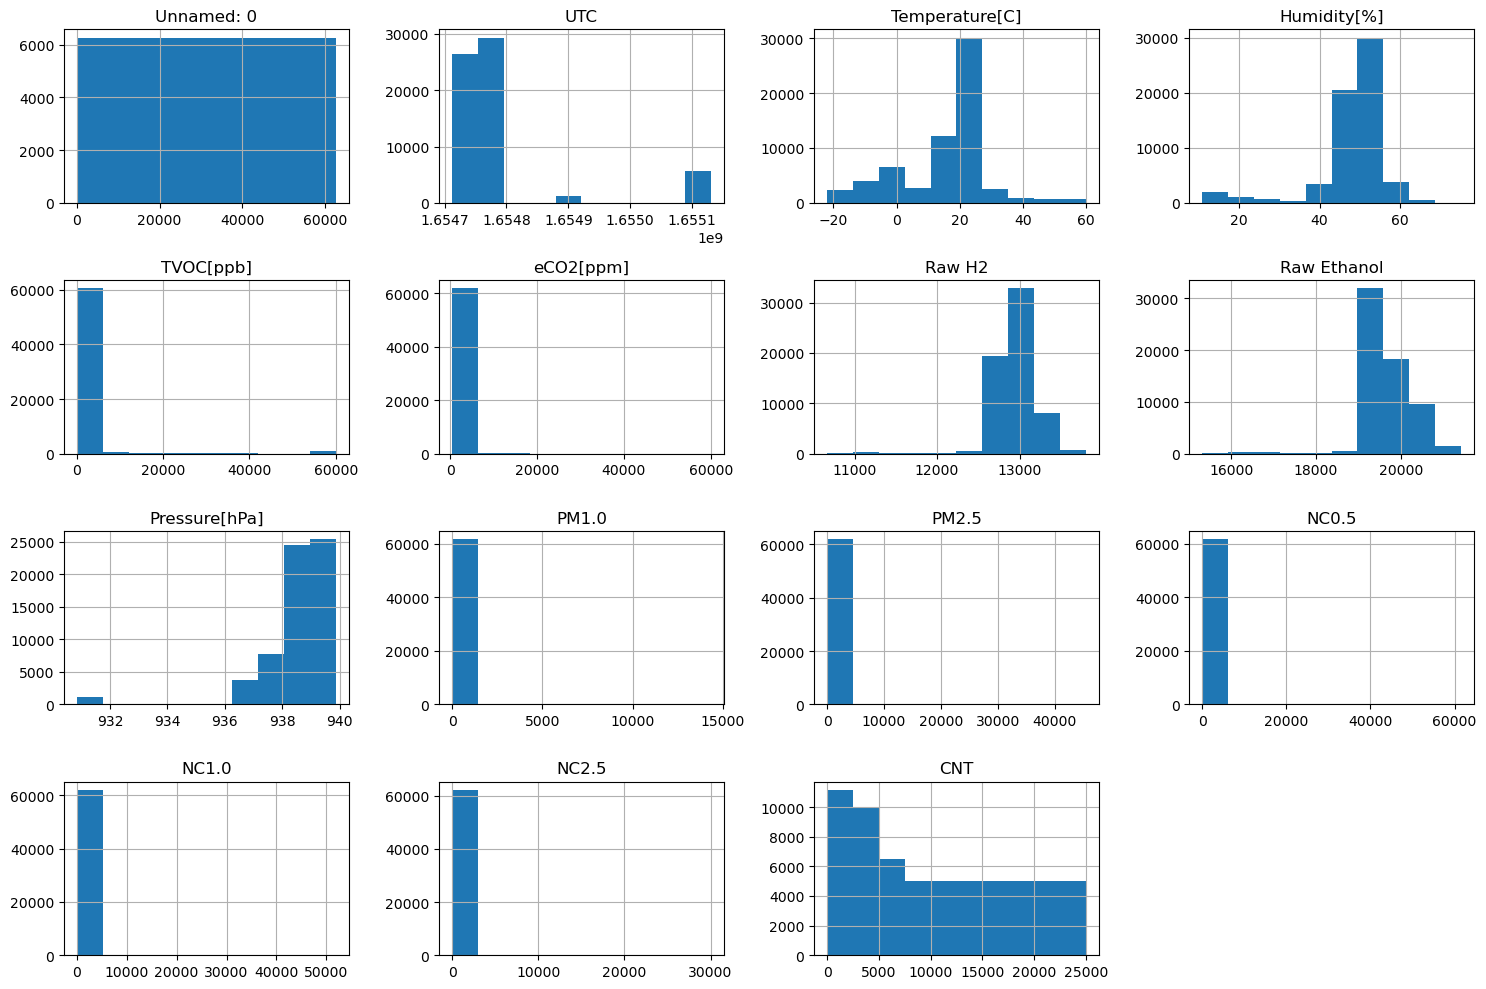

In [146]:
# Selecionando as colunas númericas do meu dataframe 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('fire_alarm') # Remonedo a variável alvo para visualizar as features

# Criando histogramas para cada variável numérica
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### Para um entendimento mínimo dos dados, eu plotei um gráfico para cada variável a fim de visualizar sua distribuição

- Unnamed e UTC: Como esperado, essas colunas parecem ter distribuições uniformes ou com picos no início, o que reforça a ideia de que Unnamed representa um índice e UTC corresponde a uma sequência temporal.

- Temperature e Humidity: A temperatura parece ter uma distribuição multimodal, com picos em diferentes faixas, o que pode indicar variações nas condições ambientais durante a coleta dos dados. A umidade apresenta uma distribuição mais concentrada em torno de certos valores, com assimetria à esquerda.

- TVOC, CO₂, Raw Ethanol, PM1.0, PM2.5, NC0, NC2.5: Essas variáveis mostram forte assimetria à direita, com a maioria dos valores concentrada perto de zero ou em faixas baixas, e alguns valores muito altos (potenciais outliers). Isso é comum em dados de sensores ambientais, nos quais eventos de alta concentração de poluentes ou gases são raros, mas significativos.

- Pressure: A pressão apresenta uma distribuição com alguns picos, possivelmente indicando diferentes condições atmosféricas. A faixa de valores parece relativamente estreita.

- CNT: O contador de amostras mostra uma distribuição com frequência maior nos valores mais baixos, diminuindo à medida que o número de amostras aumenta.

# 2 - Para essa base, onde você realizará as previsões de fire alarm, qual modelo de machine learning você aplicará? Justifique.




Para esse projeto utilizarei o modelo de Regreção logística pois é um modelo simples e facil de implementar ele tambem é um modelo facíl de se interpretar porque os coeficientes indicam a influência de cada variável, o que facilita a interpretação dos resultados.
Alem disso ele funciona bem qunado há uma relação linear entre as variaveis preditores e a target.

# 3 - Separe a base em Y e X e já rode a instância do modelo que você utilizará.

In [151]:
# Separando a base em treio de teste 
y = df['fire_alarm']
X = df.drop(columns=['fire_alarm', 'Unnamed: 0', 'UTC', 'data'])

# Instanciando o modelo de Regressão Logística 
model_rl = LogisticRegression(solver='libinear', random_state=42, max_iter=1000)

# 4 - Defina o número de Folds e rode o modelo com a validação cruzada.

In [161]:
# Definindo o número de folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Rodando a validação cruzada SEM escalonamento
scores_sem_escalonamento = cross_val_score(modelo_rl, X, y, cv=kf, scoring='accuracy')

# Exibindo as pontuações de cada fold (sem escalonamento)
print("Pontuações de acurácia na validação cruzada (SEM escalonamento):", scores_sem_escalonamento)

# Calculando a média da acurácia (sem escalonamento)
media_acuracia_sem_escalonamento = scores_sem_escalonamento.mean()

# Calculando o desvio padrão da acurácia (sem escalonamento)
desvio_padrao_acuracia_sem_escalonamento = scores_sem_escalonamento.std()

print(f"\nMédia da acurácia na validação cruzada (SEM escalonamento): {media_acuracia_sem_escalonamento:.4f}")
print(f"Desvio padrão da acurácia na validação cruzada (SEM escalonamento): {desvio_padrao_acuracia_sem_escalonamento:.4f}")

Pontuações de acurácia na validação cruzada (SEM escalonamento): [0.98722657 0.98786524 0.98986109 0.98938209 0.98850391]

Média da acurácia na validação cruzada (SEM escalonamento): 0.9886
Desvio padrão da acurácia na validação cruzada (SEM escalonamento): 0.0010


Aqui, meu objetivo foi comparar se a validação cruzada com os dados não escalonados apresentaria alguma diferença nos resultados. Inicialmente, avaliei o modelo utilizando métricas adicionais, como a acurácia, o desvio padrão e, por fim, destaquei a média da acurácia, que foi de 0,98 — um excelente resultado — com um desvio padrão de apenas 0,0010.

In [190]:
# Criando o objeto StandardScaler
scaler = StandardScaler()

# Criando o objeto de Regressão Logística
modelo_rl = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Criando o Pipeline
pipeline_rl = Pipeline([('scaler', scaler), ('logistic_regression', modelo_rl)])

# Definindo o número de folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Rodando a validação cruzada COM escalonamento
scores_com_escalonamento = cross_val_score(pipeline_rl, X, y, cv=kf, scoring='accuracy')

# Exibindo as pontuações de cada fold (COM escalonamento)
print("\nPontuações de acurácia na validação cruzada (COM escalonamento):", scores_com_escalonamento)

# Calculando a média da acurácia (COM escalonamento)
media_acuracia_com_escalonamento = scores_com_escalonamento.mean()

# Calculando o desvio padrão da acurácia (COM escalonamento)
desvio_padrao_acuracia_com_escalonamento = scores_com_escalonamento.std()

print(f"\nMédia da acurácia na validação cruzada (COM escalonamento): {media_acuracia_com_escalonamento:.4f}")
print(f"Desvio padrão da acurácia na validação cruzada (COM escalonamento): {desvio_padrao_acuracia_com_escalonamento:.4f}")


Pontuações de acurácia na validação cruzada (COM escalonamento): [0.99113843 0.99161744 0.98970142 0.99026026 0.99097876]

Média da acurácia na validação cruzada (COM escalonamento): 0.9907
Desvio padrão da acurácia na validação cruzada (COM escalonamento): 0.0007


Como imaginei, o melhorou ainda mais com os dados escalonados, alcançando uma acurácia de 0,99 e um desvio padrão de apenas 0,0007.

E como ja vimos no curso a acurácia pode ser enganosa, especialmente prevendo a classe majoritária na maioria das vezes, por isso vamos utilizar outras métricas para avaliar o nosso modelo de regressão çogística

In [214]:

# Definindo as métricas que queremos avaliar
scoring = ['precision', 'recall', 'f1']

# Rodando a validação cruzada com o Pipeline e as novas métricas
cv_results_extended = cross_validate(pipeline_rl, X, y, cv=kf, scoring=scoring)

# Exibindo os resultados para cada métrica em cada fold 
print("\nResultados da Validação Cruzada (Precisão, Recall, F1-score):")
print(f"Precisão por fold: {cv_results_extended['test_precision']}")
print(f"Recall por fold: {cv_results_extended['test_recall']}")
print(f"F1-score por fold: {cv_results_extended['test_f1']}")

# Calculando a média de cada métrica 
media_precisao_cv_extended = cv_results_extended['test_precision'].mean()
media_recall_cv_extended = cv_results_extended['test_recall'].mean()
media_f1_cv_extended = cv_results_extended['test_f1'].mean()

print(f"\nMédia da Precisão na Validação Cruzada: {media_precisao_cv_extended:.4f}")
print(f"\nMédia da Recall na Validação Cruzada: {media_recall_cv_extended:.4f}")
print(f"\nMédia da F1-score na Validação Cruzada: {media_f1_cv_extended:.4f}")


Resultados da Validação Cruzada (Precisão, Recall, F1-score):
Precisão por fold: [0.99339971 0.99406162 0.99253814 0.99284756 0.9937667 ]
Recall por fold: [0.99417824 0.99417302 0.99309115 0.99351376 0.99365609]
F1-score por fold: [0.99378882 0.99411732 0.99281457 0.99318055 0.99371139]

Média da Precisão na Validação Cruzada: 0.9933

Média da Recall na Validação Cruzada: 0.9937

Média da F1-score na Validação Cruzada: 0.9935


# 5 - Avalie a pontuação de cada modelo e ao final a validação final da média.

In [216]:
# Exibindo os resultados para cada métrica em cada fold 
print("\nResultados da Validação Cruzada (Precisão, Recall, F1-score):")
print(f"Precisão por fold: {cv_results_extended['test_precision']}")
print(f"Recall por fold: {cv_results_extended['test_recall']}")
print(f"F1-score por fold: {cv_results_extended['test_f1']}")



Resultados da Validação Cruzada (Precisão, Recall, F1-score):
Precisão por fold: [0.99339971 0.99406162 0.99253814 0.99284756 0.9937667 ]
Recall por fold: [0.99417824 0.99417302 0.99309115 0.99351376 0.99365609]
F1-score por fold: [0.99378882 0.99411732 0.99281457 0.99318055 0.99371139]


In [218]:
# Exibindo a média de cada métrica em cada fold
print(f"\nMédia da Precisão na Validação Cruzada: {media_precisao_cv_extended:.4f}")
print(f"\nMédia da Recall na Validação Cruzada: {media_recall_cv_extended:.4f}")
print(f"\nMédia da F1-score na Validação Cruzada: {media_f1_cv_extended:.4f}")


Média da Precisão na Validação Cruzada: 0.9933

Média da Recall na Validação Cruzada: 0.9937

Média da F1-score na Validação Cruzada: 0.9935
